# KMeans

## Que supone?

Supone centros (centroides) alrededor de los cuales los datos se agrupan uniformemente (esfericamente si son puntos en 3D, radialmente si son datos en 2D y linealmente si son datos unidimensionales, etc)

<img src='imagenes/kmeans1.png' width=900 style='float:left;'>

## Ejemplo Básico

In [1]:
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

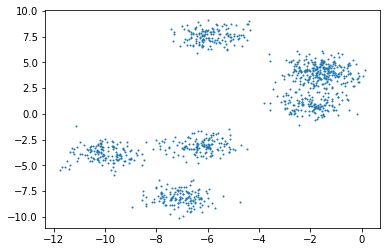

In [2]:
X, y = make_blobs(n_samples=1000, centers=7, cluster_std=0.7, random_state=1)
fig, ax = plt.subplots(figsize=(6,4), nrows=1)
ax.scatter(X[:,0], X[:,1], s=1)
plt.show()

In [3]:
from sklearn.cluster import KMeans

n = 6
modelo = KMeans(n_clusters = n).fit(X) 

y_means = modelo.fit_predict(X)
centroides = modelo.cluster_centers_

In [4]:
X[:3,1]

array([-9.00256479,  7.93731814, -0.08968061])

In [5]:
X

array([[-8.9537354 , -9.00256479],
       [-5.7533224 ,  7.93731814],
       [-1.52247635, -0.08968061],
       ...,
       [-6.06226361,  8.1459239 ],
       [-9.43152145, -2.70052027],
       [-6.35604769,  7.73838014]])

In [6]:
y_means[:10]

array([1, 2, 0, 2, 0, 3, 4, 3, 2, 3])

In [7]:
centroides

array([[ -1.97464844,   0.94638895],
       [ -7.06131015,  -8.15428389],
       [ -5.88497534,   7.56802433],
       [ -6.26529991,  -3.087848  ],
       [ -1.59613935,   4.1227784 ],
       [-10.01620831,  -3.86636082]])

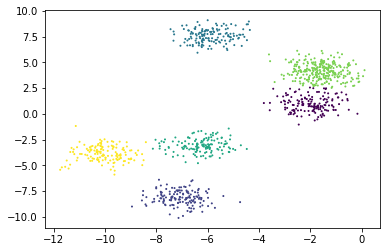

In [8]:
fig, ax = plt.subplots(figsize=(6,4), nrows=1)
ax.scatter(X[:,0], X[:,1], s=1, c=y_means)

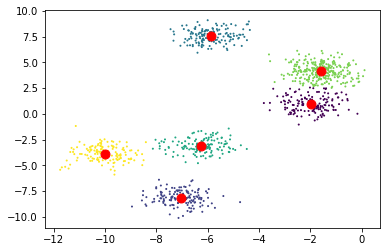

In [9]:
fig, ax = plt.subplots(figsize=(6,4), nrows=1)
ax.scatter(X[:,0], X[:,1], s=1, c=y_means)
ax.scatter(centroides[:,0], centroides[:,1], s=80, color='r')

In [10]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

davies_bouldin_score(X,y_means)

0.45321369420141

## Buscando el "k" óptimo 

* Método del codo (elbow curves)
* Gradiiente del codo
* Método de silueta (silhouette plots)
* Fomrulas propias tipo taylor-made
* Indice de Dunn
* Indice de Davies-Bouldin
* Indice Calinski-Harabasz

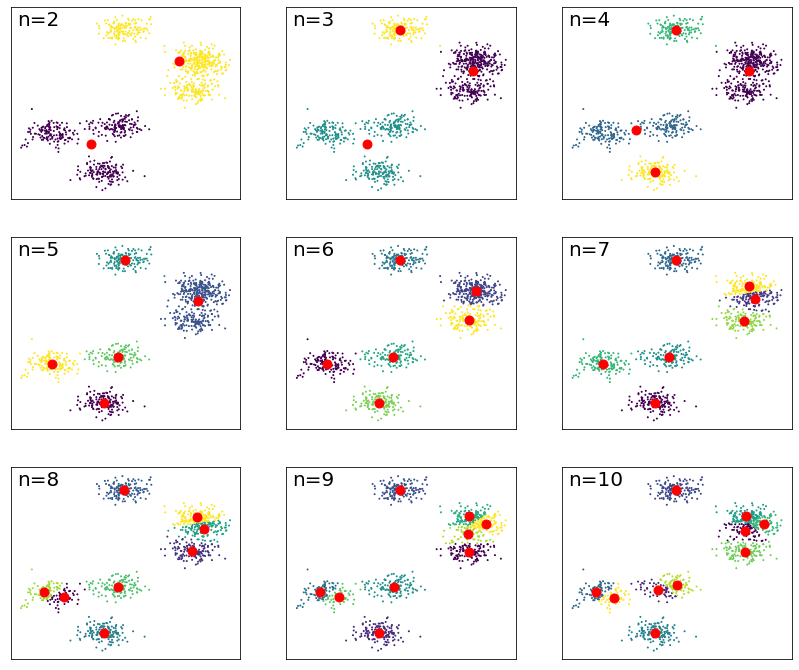

In [11]:
filas = 3
columnas = 3
fig, ax = plt.subplots(figsize=(14,12), nrows=filas, ncols=columnas)
idb, ich = [], []

for i in range (filas*columnas):
    col = i % columnas
    row = i // columnas
    modelo = KMeans(n_clusters = i+2)
    y_means = modelo.fit_predict(X)
    centroides = modelo.cluster_centers_
    ax[row][col].scatter(X[:,0], X[:,1], s=1, c=y_means)
    ax[row][col].scatter(centroides[:,0], centroides[:,1], s=80, color='r')
    ax[row][col].axes.xaxis.set_visible(False)
    ax[row][col].axes.yaxis.set_visible(False)
    ax[row][col].text(s = 'n='+str(i+2), fontsize=20, y=8, x=-12)
    
    ich.append(calinski_harabasz_score(X,y_means))
    idb.append(davies_bouldin_score(X,y_means))
    
plt.show()

In [12]:
idb

[0.5347013439178403,
 0.4363831797158532,
 0.5086167091257487,
 0.4163228990384824,
 0.45321369420140994,
 0.6261372631751524,
 0.7649733018836101,
 0.7867058762935225,
 0.8637924095249645]

In [13]:
ich

[2854.693917610759,
 2923.0330043026265,
 3584.6846577194574,
 4220.328677097289,
 6972.3352238295665,
 6614.114334427892,
 6044.55903970889,
 5694.936984450689,
 5422.348963805905]

## Método del Codo

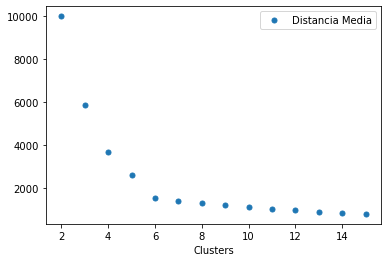

In [14]:
X, y = make_blobs(n_samples=1000, centers=7, cluster_std=0.9, random_state=1)
fig, ax = plt.subplots(figsize=(6,4), nrows=1)

pruebas = 15
modelos = [KMeans(n_clusters = n).fit(X)  for n in range(2,pruebas+1)]

distancia_media = [m.inertia_ for m in modelos]
labels = [m.labels_ for m in modelos]
ax.plot(range(2,pruebas+1), distancia_media, lw=0, marker='o', markersize=5, label='Distancia Media')
ax.legend()
ax.set_xlabel('Clusters')
plt.show()

<AxesSubplot:>

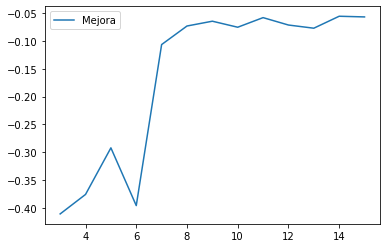

In [15]:
import pandas as pd

pruebas = 15
pd.DataFrame(distancia_media, index=range(2,pruebas+1), columns=['Mejora']).pct_change().plot()

## Método de la silueta

$$ \Large s(i)={\frac {b(i)-a(i)}{\max\{a(i),b(i)\}}} \hspace{10mm} \small \begin{cases}
  1-a(i)/b(i), & \mbox{if } a(i) < b(i) \\
  0,  & \mbox{if } a(i) = b(i) \\
  b(i)/a(i)-1, & \mbox{if } a(i) > b(i) \\
\end{cases}
$$

para cada punto:
   * a: distancia media intercluster
   * b: distancia mas cercana al cluster vecino

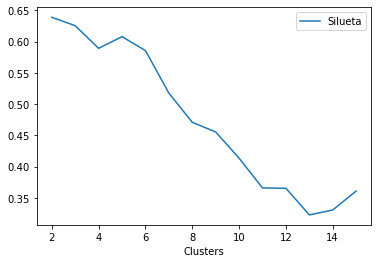

In [16]:
from sklearn.metrics import silhouette_score

fig, ax = plt.subplots(figsize=(6,4), nrows=1)

pruebas = 15
modelos = [KMeans(n_clusters = n).fit(X)  for n in range(2,pruebas+1)]

siluetas = [silhouette_score(X, m.labels_) for m in modelos]
labels = [m.labels_ for m in modelos]
ax.plot(range(2,pruebas+1), siluetas, label='Silueta')
ax.legend()
ax.set_xlabel('Clusters')
plt.show()

## Fórmula taylor made

Vamos a poner:
   * Silueta en el numerador (a mayor valor mejor)
   * Distancia media en el denominador (a menor distancia mejor)
   * Numero de clusteres en el denominador (penalizando el sobreajuste)

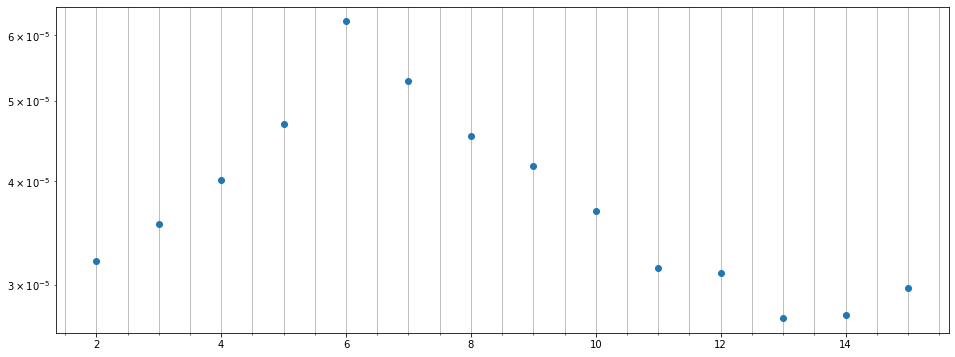

In [17]:
import numpy as np
import pandas as pd

pruebas = 15
res = pd.DataFrame(np.array(siluetas) / (np.array(distancia_media) * np.arange(2,pruebas+1)), index=range(2,pruebas+1))
fig, ax = plt.subplots(figsize=(16,6), nrows=1)

plt.minorticks_on()
plt.grid(True, axis='x', which='both')
ax.plot(res, marker='o', lw=0)
ax.set_yscale('log')

## ¿Donde falla K-means?

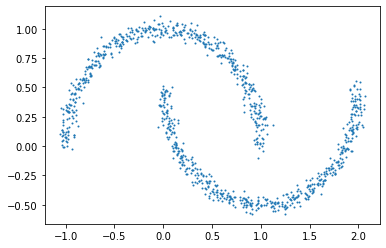

In [18]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(1000, noise=0.04, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], s=1)

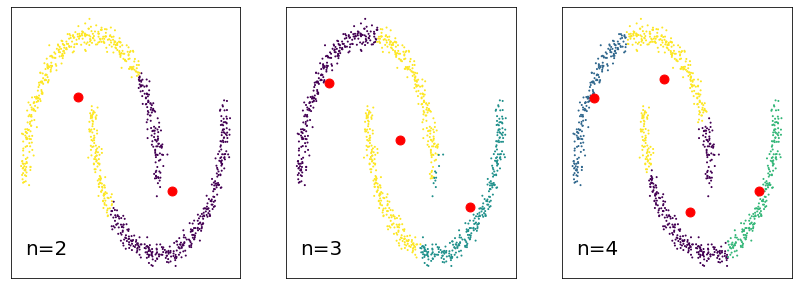

In [19]:
columnas = 3
fig, ax = plt.subplots(figsize=(14,5), ncols=columnas)

X = Xmoon
for i in range (columnas):
    modelo = KMeans(n_clusters = i+2)
    y_means = modelo.fit_predict(X)
    centroides = modelo.cluster_centers_
    ax[i].scatter(X[:,0], X[:,1], s=1, c=y_means)
    ax[i].scatter(centroides[:,0], centroides[:,1], s=80, color='r')
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)
    ax[i].text(s = 'n='+str(i+2), fontsize=20, y=-.5, x=-1)
    

plt.show()

## Donde mas?

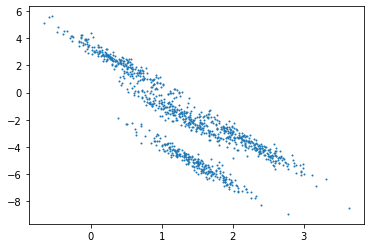

In [20]:
X, y = make_blobs(random_state=1, n_samples=1000, centers = 4)

# Transformo las manchas de puntos en estrechas
rng = np.random.RandomState(6)
transformation = rng.normal(size=(2, 2))
X_estrechos = np.dot(X, transformation)

plt.scatter(X_estrechos[:, 0], X_estrechos[:, 1], s=1)

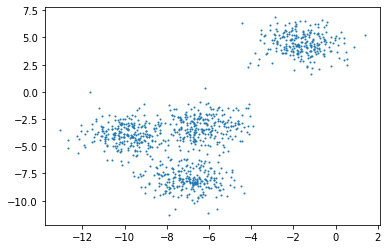

In [21]:
plt.scatter(X[:, 0], X[:, 1], s=1)

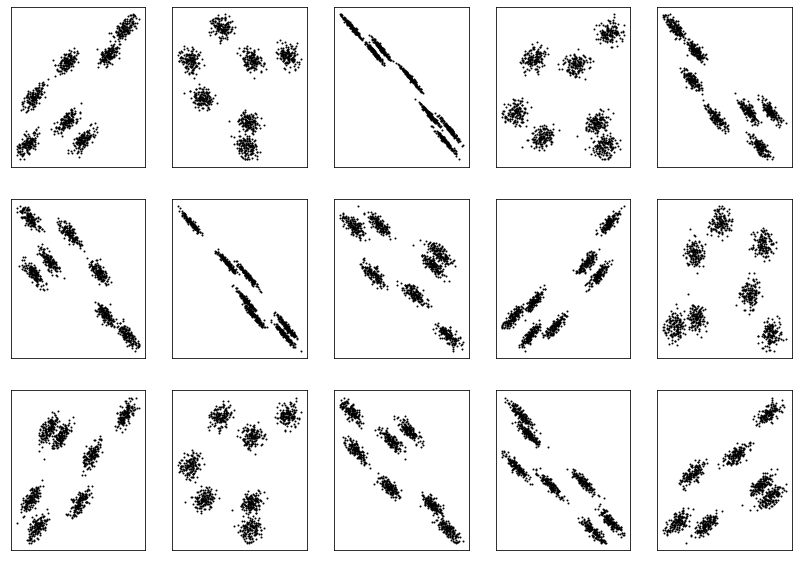

In [22]:
filas = 3
columnas = 5
fig, ax = plt.subplots(figsize=(14,10), nrows=filas, ncols=columnas)

X, y = make_blobs(random_state=10, n_samples=1000, centers = 7)

for i in range (filas*columnas):
    rng = np.random.RandomState(i)
    transformation = rng.normal(size=(2, 2))
    X_stretched = np.dot(X, transformation)
    col = i % columnas
    row = i // columnas
    ax[row][col].scatter(X_stretched[:,0], X_stretched[:,1], s=1, c='k')
    ax[row][col].axes.xaxis.set_visible(False)
    ax[row][col].axes.yaxis.set_visible(False)

plt.show()

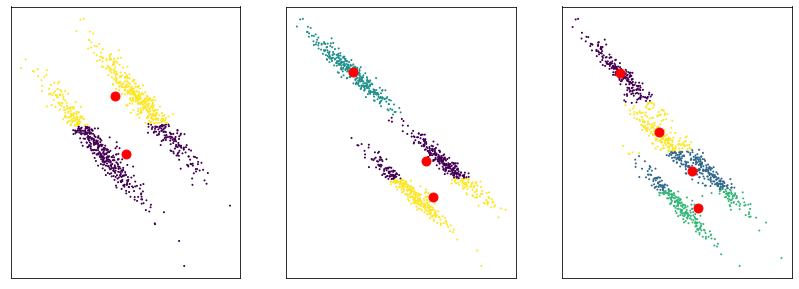

In [23]:
columnas = 3
fig, ax = plt.subplots(figsize=(14,5), ncols=columnas)

for i in range (columnas):
    
    X, y = make_blobs(random_state=1, n_samples=1000, centers = i+2)
    rng = np.random.RandomState(6)
    transformation = rng.normal(size=(2, 2))
    X_estrechos = np.dot(X, transformation)

    modelo = KMeans(n_clusters = i+2).fit(X_estrechos) 
    y_means = modelo.predict(X_estrechos)
    centroides = modelo.cluster_centers_
    ax[i].scatter(X_estrechos[:,0], X_estrechos[:,1], s=1, c=y_means)
    ax[i].scatter(centroides[:,0], centroides[:,1], s=80, color='r')
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)
    
plt.show()

# Mezcla Gaussiana

## ¿Qué supone?

* Los puntos no se distribuyen uniformemente en las dimensiones que tenga el set de datos


* Se distribuyen según la distr normal


* Los clusteres pueden tomar formas elípticas siguiendo distr normal para dimension X e Y (dist focales)


* IMPORTANTE: La mayoria de los puntos estan aglomerados en el centro del cluster, pero permite outliers como en una distr normal


* Cada cluster puede tener una matriz de covarianzas independiente (covariance_type=Full) o bien compartir todos la misma matriz (covariance_type=tied) incluso puede generalizarse a un kmeans usando covariance_type=spherical tratando a cada cluster con una varianza unica}


## Ejemplo básico

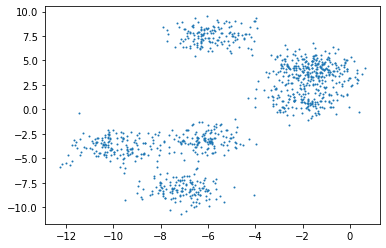

In [24]:
X, y = make_blobs(n_samples=1000, centers=7, cluster_std=0.9, random_state=1)
fig, ax = plt.subplots(figsize=(6,4), nrows=1)
ax.scatter(X[:,0], X[:,1], s=1)
plt.show()

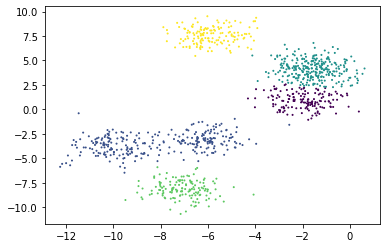

In [25]:
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

modelo = GaussianMixture(n_components=5, covariance_type='full').fit(X)
y_means = modelo.predict(X)

fig, ax = plt.subplots(figsize=(6,4), nrows=1)
ax.scatter(X[:,0], X[:,1], s=1, c=y_means)

## Método silueta para encontrar número óptimo

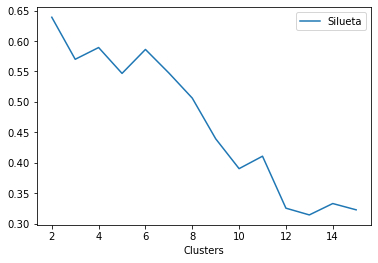

In [26]:
from sklearn.metrics import silhouette_score

fig, ax = plt.subplots(figsize=(6,4), nrows=1)

pruebas = 15
modelos = [GaussianMixture(n_components=n, covariance_type='full').fit(X)  for n in range(2,pruebas+1)]

labels = [m.predict(X) for m in modelos]
siluetas = [silhouette_score(X, m.predict(X)) for m in modelos]
ax.plot(range(2,pruebas+1), siluetas, label='Silueta')
ax.legend()
ax.set_xlabel('Clusters')
plt.show()

## Criterio de información Bayesiana y Akaike

Principal ventaja de ambos: Penaliza la mayor cantidad de clusteres (sobretodo el BIC) y me evita sobreajustar

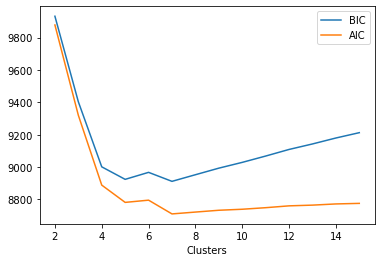

In [27]:
fig, ax = plt.subplots(figsize=(6,4))

pruebas = np.arange(2, 16)
modelos = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in pruebas]
ax.plot(pruebas, [m.bic(X) for m in modelos], label='BIC')
ax.plot(pruebas, [m.aic(X) for m in modelos], label='AIC')
ax.legend(loc='best')
ax.set_xlabel('Clusters')
plt.show()

## ¿y como camina esto con las nubes estrechas?

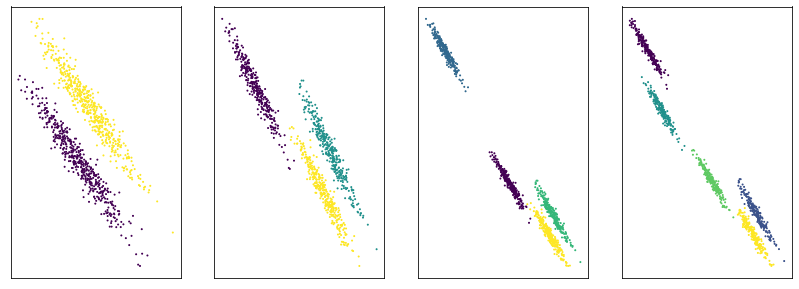

In [28]:
columnas = 4
fig, ax = plt.subplots(figsize=(14,5), ncols=columnas)

for i in range (columnas):
    
    X, y = make_blobs(random_state=170, n_samples=1000, centers = i+2)
    rng = np.random.RandomState(6)
    transformation = rng.normal(size=(2, 2))
    X_estrechos = np.dot(X, transformation)

    modelo = GaussianMixture(n_components=i+2, covariance_type='full').fit(X_estrechos)
    y_means = modelo.fit_predict(X_estrechos)
    ax[i].scatter(X_estrechos[:,0], X_estrechos[:,1], s=1, c=y_means)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)
    
plt.show()

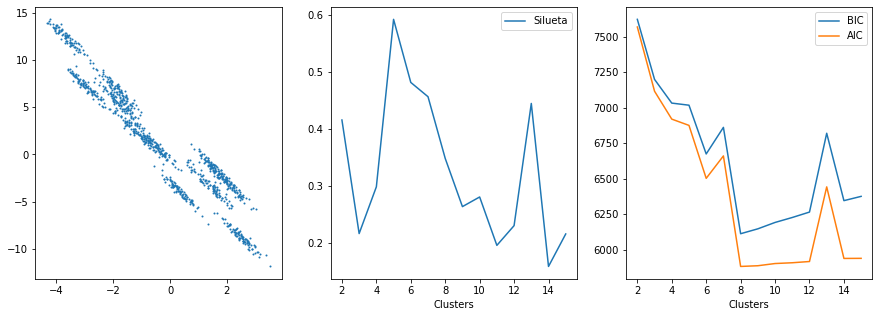

In [29]:
X, y = make_blobs(random_state=170, n_samples=1000, centers = 11)
rng = np.random.RandomState(6)
transformation = rng.normal(size=(2, 2))
X_estrechos = np.dot(X, transformation)

fig, ax = plt.subplots(figsize=(15,5), ncols=3)
ax[0].scatter(X_estrechos[:, 0], X_estrechos[:, 1], s=1)

pruebas = np.arange(2, 16)
modelos = [GaussianMixture(n_components=n, covariance_type='full').fit(X_estrechos)  for n in pruebas]

labels = [m.predict(X_estrechos) for m in modelos]
siluetas = [silhouette_score(X_estrechos, m.predict(X_estrechos)) for m in modelos]
ax[1].plot(pruebas, siluetas, label='Silueta')
ax[1].legend()
ax[1].set_xlabel('Clusters')


ax[2].plot(pruebas, [m.bic(X_estrechos) for m in modelos], label='BIC')
ax[2].plot(pruebas, [m.aic(X_estrechos) for m in modelos], label='AIC')
ax[2].legend(loc='best')
ax[2].set_xlabel('Clusters')


plt.show()

## ¿Y con las medialunas?

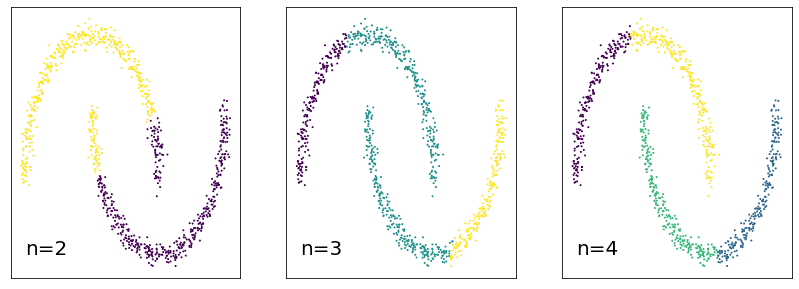

In [30]:
columnas = 3
fig, ax = plt.subplots(figsize=(14,5), ncols=columnas)

for i in range (columnas):
    modelo = GaussianMixture(n_components=i+2, covariance_type='full').fit(X)
    y_means = modelo.fit_predict(Xmoon)
    ax[i].scatter(Xmoon[:,0], Xmoon[:,1], s=1, c=y_means)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)
    ax[i].text(s = 'n='+str(i+2), fontsize=20, y=-.5, x=-1)
    
plt.show()

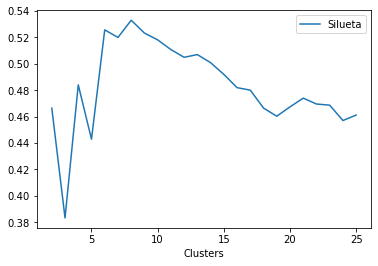

In [31]:
fig, ax = plt.subplots(figsize=(6,4), nrows=1)

pruebas = 25
modelos = [GaussianMixture(n_components=n, covariance_type='full').fit(Xmoon)  for n in range(2,pruebas+1)]

labels = [m.predict(Xmoon) for m in modelos]
siluetas = [silhouette_score(Xmoon, m.predict(Xmoon)) for m in modelos]
ax.plot(range(2,pruebas+1), siluetas, label='Silueta')
ax.legend()
ax.set_xlabel('Clusters')
plt.show()

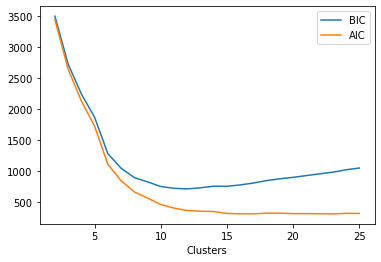

In [32]:
fig, ax = plt.subplots(figsize=(6,4))

pruebas = np.arange(2, 26)
modelos = [GaussianMixture(n, covariance_type='full', random_state=0).fit(Xmoon) for n in pruebas]
ax.plot(pruebas, [m.bic(Xmoon) for m in modelos], label='BIC')
ax.plot(pruebas, [m.aic(Xmoon) for m in modelos], label='AIC')
ax.legend(loc='best')
ax.set_xlabel('Clusters')
plt.show()

## ¿Y a donde nos metemos las medialunas entonces?

tranca, todavia no

# DBSCAN

## ¿Que hace?

* Empieza seleccionando arbitrariamente un punto (hasta visitar todos)


* Si hay al menos una cantidad de "minPoints" (min_samples) dentro de un radio de "ε" (EPS) hasta el punto, entonces consideramos que todos estos puntos forman parte del mismo grupo.


* Los grupos se expanden sucesivamente hasta barrer a todos

<img src='imagenes/DBSCAN.gif'>

## Ventajas y Desventajas

### Ventajas

* No requiere un número K de clusteres como input, lo determina solo (pero requiere una parametrizacion de distancia mínima)


* Permite clasificar o etiquetar como "ruido" a los puntos visitados que no entran en la distancia minima de ningun cluster


### Desventajas

* Cuando hay clusteres de densidad variable anda muy mal, porque el epsilon es un parámetro único:
    * Si es grande genera muchos clusters en las zonas menos densas
    * Si es chico deja las zonas menos densas como "ruido"

## Ejemplo básico, solución ideal para las medialunas

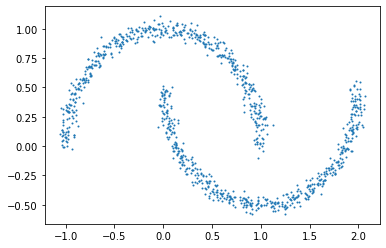

In [33]:
from sklearn.cluster import DBSCAN

Xmoon, ymoon = make_moons(1000, noise=0.04, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], s=1)

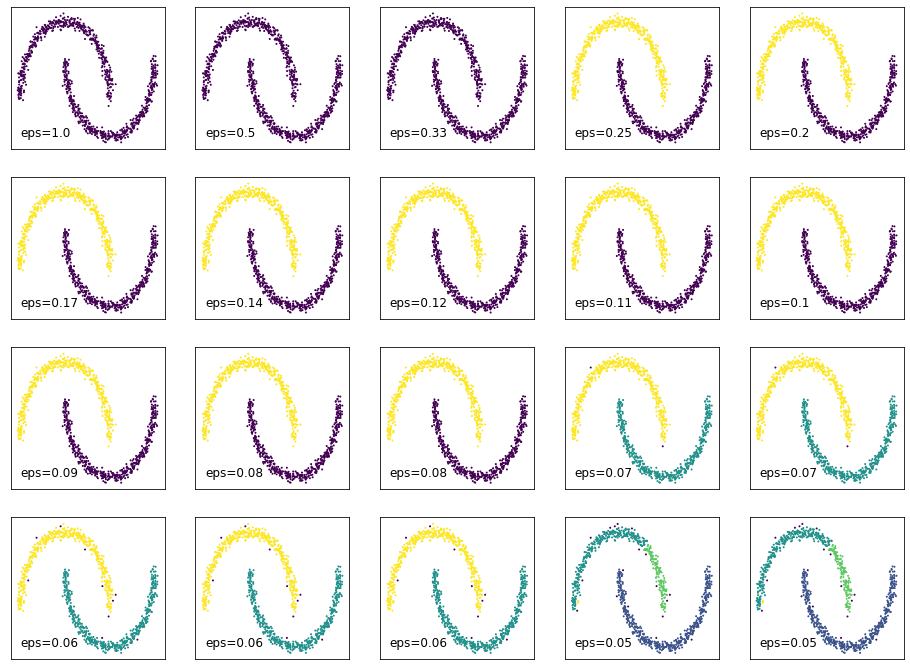

In [34]:
filas = 4
columnas = 5
fig, ax = plt.subplots(figsize=(16,12), nrows=filas, ncols=columnas)

for i in range (filas*columnas):
    col = i % columnas
    row = i // columnas
    
    tolerancia = round(1/(i+1),2)
    modelo = DBSCAN(eps = tolerancia, min_samples=2).fit(Xmoon) 
    y_means = modelo.fit_predict(Xmoon)
    ax[row][col].scatter(Xmoon[:,0], Xmoon[:,1], s=1, c=y_means)
    ax[row][col].axes.xaxis.set_visible(False)
    ax[row][col].axes.yaxis.set_visible(False)
    ax[row][col].text(s = 'eps='+str(tolerancia), fontsize=12, y=-0.5, x=-1)
    

plt.show()

## ¿Como mediría la optimización de este bicho?

Con epsilon=1.0 hay un solo cluster
Con epsilon=0.5 hay un solo cluster
Con epsilon=0.33 hay un solo cluster


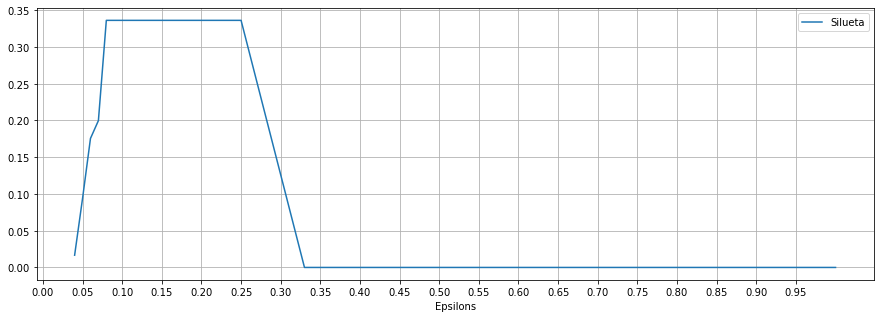

In [35]:
fig, ax = plt.subplots(figsize=(15,5), nrows=1)

pruebas = 25
siluetas = []
epsilons = []
for n in range(pruebas):
    epsilon = round(1/(n+1),2)
    epsilons.append(epsilon)
    try:
        m = DBSCAN(eps = epsilon, min_samples=2).fit(Xmoon)
        siluetas.append(silhouette_score(Xmoon, m.labels_))
    except:
        print(f'Con epsilon={epsilon} hay un solo cluster')
        siluetas.append(0)

    
ax.plot(epsilons, siluetas, label='Silueta')
ax.legend()
ax.set_xlabel('Epsilons')

ax.set_xticks(np.arange(0, 1, 0.05))
plt.grid()
plt.show()

In [36]:
siluetas

[0,
 0,
 0,
 0.3362849340508626,
 0.3362849340508626,
 0.3362849340508626,
 0.3362849340508626,
 0.3362849340508626,
 0.3362849340508626,
 0.3362849340508626,
 0.3362849340508626,
 0.3362849340508626,
 0.3362849340508626,
 0.19980078955382702,
 0.19980078955382702,
 0.17558042852924227,
 0.17558042852924227,
 0.17558042852924227,
 0.09387066354362358,
 0.09387066354362358,
 0.09387066354362358,
 0.09387066354362358,
 0.016645320327049917,
 0.016645320327049917,
 0.016645320327049917]

# MeanShift

## Ventajas y desventajas

Ventajas

* No necesitas pasarle el numero de clusters, lo calcula solo
* No hay riesgo de overfiting

Desventajas

* Es muy lento
* Igual que K-means no sirve para nubes de puntos no uniformes y radiales

## Ejemplo Básico

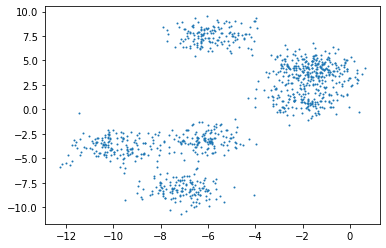

In [37]:
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=1000, centers=7, cluster_std=0.9, random_state=1)
fig, ax = plt.subplots(figsize=(6,4), nrows=1)
ax.scatter(X[:,0], X[:,1], s=1)
plt.show()

In [38]:
from sklearn.cluster import estimate_bandwidth

bw = estimate_bandwidth(X, quantile=0.3)
bw

4.292624855822502

In [39]:
modelo = MeanShift(bandwidth=bw)
y_means = modelo.fit_predict(X)
centroides = modelo.cluster_centers_

In [40]:
y_means[:10], centroides

(array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64),
 array([[-1.7223712 ,  3.00665111],
        [-7.83270076, -4.73010697]]))

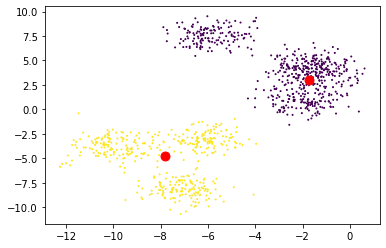

In [41]:
fig, ax = plt.subplots(figsize=(6,4), nrows=1)
ax.scatter(X[:,0], X[:,1], s=1, c=y_means)
ax.scatter(centroides[:,0], centroides[:,1], s=80, color='r')

## Dejar datos sin etiquetar

In [42]:
bw

4.292624855822502

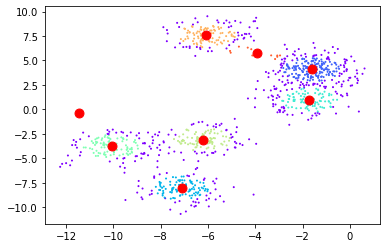

In [43]:
bw = estimate_bandwidth(X, quantile=0.06)
modelo = MeanShift(bandwidth=bw, cluster_all = False)
y_means = modelo.fit_predict(X)
centroides = modelo.cluster_centers_

fig, ax = plt.subplots(figsize=(6,4), nrows=1)
ax.scatter(X[:,0], X[:,1], s=1, c=y_means, cmap='rainbow')
ax.scatter(centroides[:,0], centroides[:,1],  s=80, color='r')


In [44]:
pd.DataFrame(y_means).groupby(0).size()

0
-1    379
 0    164
 1     94
 2     91
 3     88
 4     87
 5     85
 6     11
 7      1
dtype: int64

El -1 son los no etiquetados

## Sensibilidad al ancho de banda

Calculando N = 2
Calculando N = 3
Calculando N = 4
Calculando N = 5
Calculando N = 6
Calculando N = 7


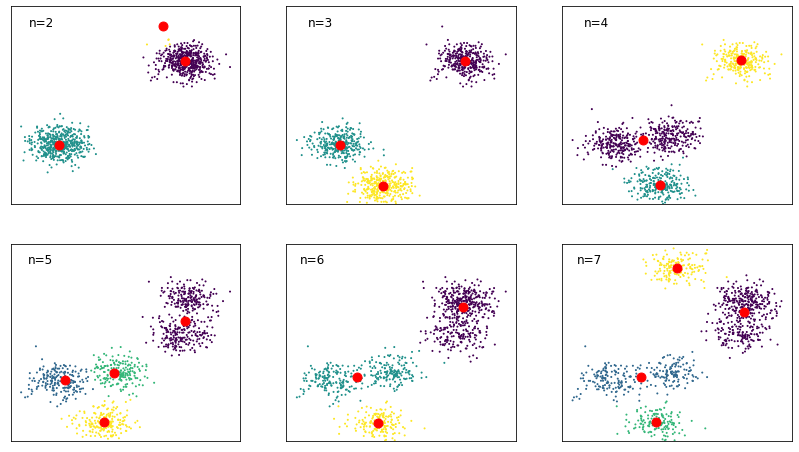

In [45]:
filas = 2
columnas = 3
fig, ax = plt.subplots(figsize=(14,8), nrows=filas, ncols=columnas)

for i in range (filas*columnas):
    print('Calculando N =',str(i+2))
    X, y = make_blobs(n_samples=1000, centers=i+2, cluster_std=0.9, random_state=1)
    bw = estimate_bandwidth(X, quantile=0.2)
    col = i % columnas
    row = i // columnas
    modelo = MeanShift(bandwidth=bw)
    y_means = modelo.fit_predict(X)
    centroides = modelo.cluster_centers_
    ax[row][col].scatter(X[:,0], X[:,1], s=1, c=y_means)
    ax[row][col].scatter(centroides[:,0], centroides[:,1], s=80, color='r')
    ax[row][col].axes.xaxis.set_visible(False)
    ax[row][col].axes.yaxis.set_visible(False)
    ax[row][col].set_ylim(-10,10)
    ax[row][col].text(s = 'n='+str(i+2), fontsize=12, y=8, x=-12)

plt.show()

Calculando N = 2
Calculando N = 3
Calculando N = 4
Calculando N = 5
Calculando N = 6
Calculando N = 7


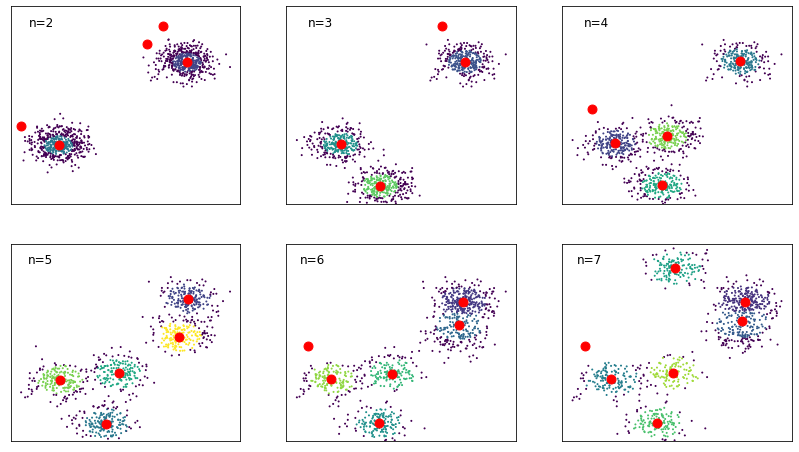

In [46]:
filas = 2
columnas = 3
fig, ax = plt.subplots(figsize=(14,8), nrows=filas, ncols=columnas)

for i in range (filas*columnas):
    print('Calculando N =',str(i+2))
    X, y = make_blobs(n_samples=1000, centers=i+2, cluster_std=0.9, random_state=1)
    bw = estimate_bandwidth(X, quantile=0.1)
    col = i % columnas
    row = i // columnas
    modelo = MeanShift(bandwidth = bw, cluster_all = False)
    y_means = modelo.fit_predict(X)
    centroides = modelo.cluster_centers_
    ax[row][col].scatter(X[:,0], X[:,1], s=1, c=y_means)
    ax[row][col].scatter(centroides[:,0], centroides[:,1], s=80, color='r')
    ax[row][col].axes.xaxis.set_visible(False)
    ax[row][col].axes.yaxis.set_visible(False)
    ax[row][col].set_ylim(-10,10)
    ax[row][col].text(s = 'n='+str(i+2), fontsize=12, y=8, x=-12)

plt.show()

## Funcionamiento de MeanShift para nubes "no radiales"

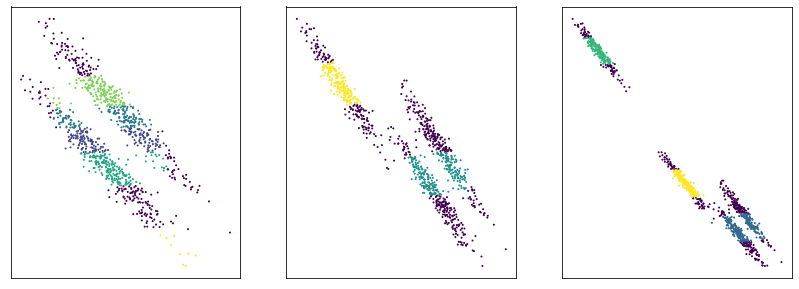

In [47]:
columnas = 3
fig, ax = plt.subplots(figsize=(14,5), ncols=columnas)

for i in range (columnas):
    
    X, y = make_blobs(random_state=170, n_samples=1000, centers = i+2)
    rng = np.random.RandomState(6)
    transformation = rng.normal(size=(2, 2))
    X_estrechos = np.dot(X, transformation)

    bw = estimate_bandwidth(X_estrechos, quantile=0.15)
    modelo = MeanShift(bandwidth=bw, cluster_all = False)
    y_means = modelo.fit_predict(X_estrechos)
    ax[i].scatter(X_estrechos[:,0], X_estrechos[:,1], s=1, c=y_means)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)
    
plt.show()

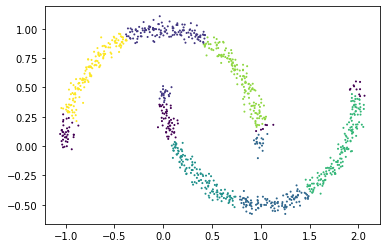

In [48]:
from sklearn.datasets import make_moons

Xmoon, ymoon = make_moons(1000, noise=0.04, random_state=0)
bw = estimate_bandwidth(Xmoon, quantile=0.15)
modelo = MeanShift(bandwidth=bw, cluster_all = False)
y_means = modelo.fit_predict(Xmoon)

fig, ax = plt.subplots(figsize=(6,4), nrows=1)
ax.scatter(Xmoon[:,0], Xmoon[:,1], s=1, c=y_means)

# Aplicación Práctica

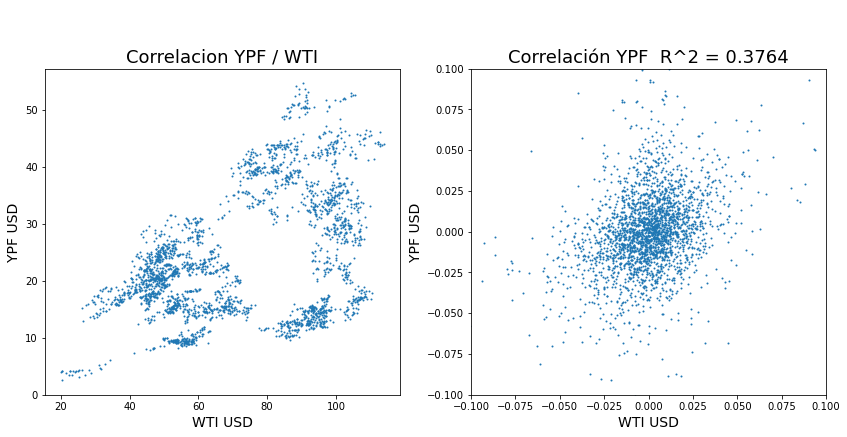

In [50]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

papel = "YPF"  # Disponibles: XOM RDSa BP PAM YPF CVX COP EOG SLB VLO WMB

data = pd.read_excel("Oil.xlsx")
Px = np.array(list(zip(data['WTI Px'], data[papel + " Px"])))
Var = np.array(list(zip(data['WTI Var'], data[papel + " Var"])))

fig, ax = plt.subplots(figsize=(14,6), ncols=2)
r2 = data['WTI Var'].corr(data[papel+' Var']).round(4)

titulo = 'Correlacion '+papel+' / WTI'
ax[0].scatter(Px[:,0],Px[:,1], s=1)
ax[0].set_title(titulo, fontsize=18)
ax[0].set_xlabel('WTI USD', fontsize=14)
ax[0].set_ylabel(papel+' USD', fontsize=14)


titulo  = "\n\nCorrelación " +papel + "  R^2 = " + str(r2)
ax[1].scatter(Var[:,0],Var[:,1], s=1)
ax[1].set_xlim(-0.1,0.1)
ax[1].set_ylim(-0.1,0.1)
ax[1].set_title(titulo, fontsize=18)
ax[1].set_xlabel('WTI USD', fontsize=14)
ax[1].set_ylabel(papel+' USD', fontsize=14)

plt.show()

In [51]:
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

## Probamos con K-means

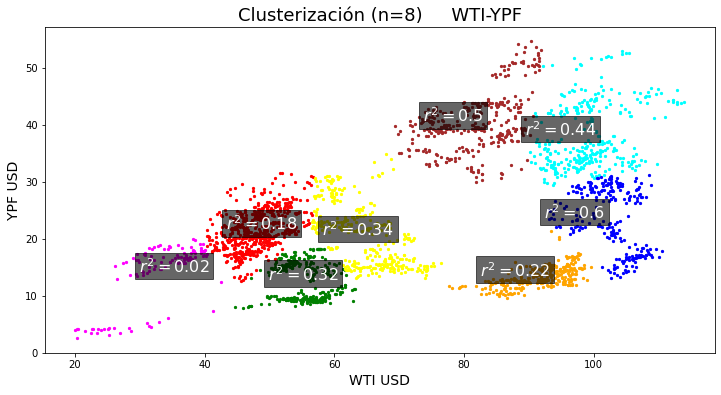

In [52]:
n = 8 # Cantidad de Clusters

papel = 'YPF'
# Detalles del Gráfico
plt.figure(figsize=(12,6))
colores= ["orange","green","brown","cyan","magenta","blue","red","yellow","lightgreen","pink"]  
plt.title('Clusterización (n=' +str(n)+ ')     WTI-'+papel, fontsize=18)
plt.xlabel('WTI USD', fontsize=14)
plt.ylabel(papel+' USD', fontsize=14)

# K-Means
modelo = KMeans(n_clusters=n)
y_means = modelo.fit_predict(Px)
centroides = modelo.cluster_centers_

# Etiqueto los clusteres en el dataframe
clustersList = list(y_means)
for i in range(len(data)):
    data.loc[i,'cluster'] = clustersList.pop()

# Grafico
for c in range(n):
    
    # correlacion del cluster
    df = data.loc[data.cluster == c]
    co = round(df['WTI Var'].corr(df[papel + " Var"]),2)
    
    # Puntos y etiqueta del cluster
    plt.scatter(Px[y_means==c,0],Px[y_means==c,1], s=5, color=colores[c], cmap='rainbow')
    coords = (centroides[c,0]*0.9, centroides[c,1])
    t = plt.gca().annotate(f"$ r^2 = {co} $".format('g'), coords, fontsize=16, c="w")
    t.set_bbox(dict(facecolor='k', alpha=0.6, edgecolor='k'))


In [53]:
data

Date  WTI Px   WTI Var  XOM Px   XOM Var  RDSa Px  RDSa Var  BP Px  \
0    2020-04-09   22.76 -0.092866   43.13 -0.016420    37.91 -0.004203  24.90   
1    2020-04-08   25.09  0.061786   43.85  0.063288    38.07  0.021739  25.39   
2    2020-04-07   23.63 -0.093942   41.24  0.019026    37.26 -0.001875  24.80   
3    2020-04-06   26.08 -0.079746   40.47  0.032135    37.33  0.030077  25.05   
4    2020-04-03   28.34  0.119273   39.21 -0.029455    36.24 -0.069815  24.72   
...         ...     ...       ...     ...       ...      ...       ...    ...   
2534 2010-03-17   82.93  0.015055   67.36  0.011867    59.90  0.015082  58.15   
2535 2010-03-16   81.70  0.023810   66.57  0.004072    59.01  0.018643  57.18   
2536 2010-03-15   79.80 -0.017725   66.30 -0.007485    57.93 -0.005494  56.58   
2537 2010-03-12   81.24 -0.010596   66.80 -0.006248    58.25  0.003272  56.86   
2538 2010-03-11   82.11  0.000000   67.22  0.000000    58.06  0.000000  56.60   

        BP Var  PAM Px  ...   COP Var  EOG Px   EOG Var  SLB Px   SLB Var  \
0    -0.019299   10.42  ... -0.026626   44.82 -0.010378   16.47 -0.046875   
1     0.023790   10.98  ...  0.072438   45.29  0.095814   17.28  0.049180   
2    -0.009980   10.70  ...  0.014329   41.33  0.048187   16.47  0.051053   
3     0.013350   10.78  ... -0.003342   39.43 -0.011532   15.67  0.096571   
4    -0.050327   10.95  ... -0.028057   39.89  0.041514   14.29  0.029539   
...        ...     ...  ...       ...     ...       ...     ...       ...   
2534  0.016964   10.96  ...  0.015590   47.91 -0.006841   66.60  0.016484   
2535  0.010604   10.91  ...  0.010160   48.24 -0.004334   65.52  0.018815   
2536 -0.004924   10.90  ... -0.000761   48.45 -0.006969   64.31 -0.003564   
2537  0.004594   10.96  ...  0.007415   48.79 -0.002045   64.54  0.010016   
2538  0.000000   10.81  ...  0.000000   48.89  0.000000   63.90  0.000000   

      VLO Px   VLO Var  WMB Px   WMB Var  cluster  
0      50.10 -0.029070   16.59  0.081486      2.0  
1      51.60  0.074776   15.34  0.012541      2.0  
2      48.01  0.041432   15.15  0.122222      2.0  
3      46.10  0.142786   13.50 -0.010989      2.0  
4      40.34 -0.027952   13.65 -0.050765      2.0  
...      ...       ...     ...       ...      ...  
2534   18.87  0.004792   18.86 -0.000530      4.0  
2535   18.78  0.009677   18.87  0.017799      4.0  
2536   18.60 -0.003749   18.54 -0.007495      4.0  
2537   18.67  0.001609   18.68  0.002684      4.0  
2538   18.64  0.000000   18.63  0.000000      4.0  

[2539 rows x 26 columns]

## Buscamos un "k" optimo?

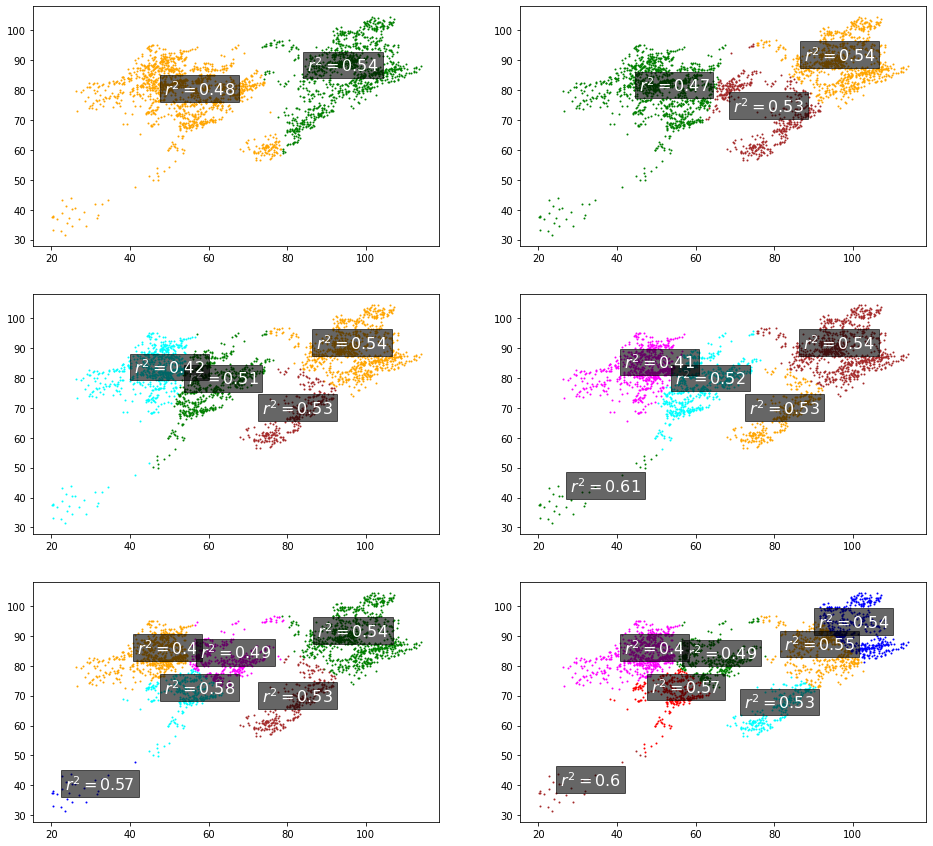

In [54]:
papel = "XOM"  
data = pd.read_excel("Oil.xlsx")
Px = np.array(list(zip(data['WTI Px'], data[papel + " Px"])))
Var = np.array(list(zip(data['WTI Var'], data[papel + " Var"])))

filas = 3
columnas = 2
fig, ax = plt.subplots(figsize=(16,15), nrows=filas, ncols=columnas)

for i in range (filas*columnas):
    col = i % columnas
    row = i // columnas
    modelo = KMeans(n_clusters = i+2)
    y_means = modelo.fit_predict(Px)
    centroides = modelo.cluster_centers_

    # Etiqueto los clusteres en el dataframe
    clustersList = list(y_means)
    for j in range(len(data)):
        data.loc[j,'cluster'] = clustersList.pop()

    # Grafico
    for c in range(i+2):

        # correlacion del cluster
        df = data.loc[data.cluster == c]
        co = round(df['WTI Var'].corr(df[papel + " Var"]),2)

        # Puntos y etiqueta del cluster
        ax[row][col].scatter(Px[y_means==c,0],Px[y_means==c,1], s=1, color=colores[c])
        coords = (centroides[c,0]*0.9, centroides[c,1])
        t = ax[row][col].annotate(f"$ r^2 = {co} $".format('g'), coords, fontsize=16, c="w")
        t.set_bbox(dict(facecolor='k', alpha=0.6, edgecolor='k'))


plt.show()

## Usamos la Mezcla Gaussiana

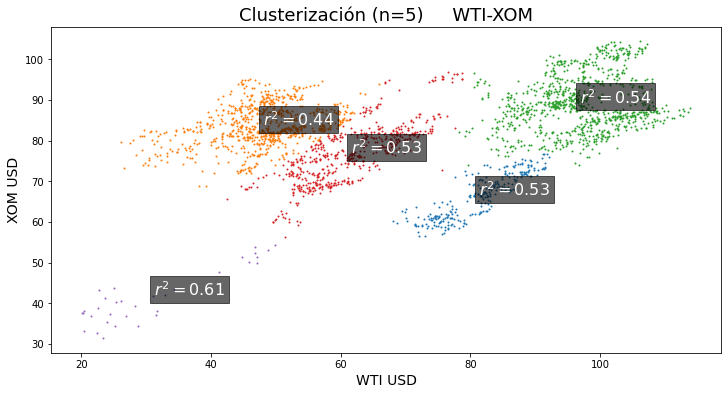

In [55]:
n = 5 # Cantidad de Clusters

# Detalles del Gráfico
plt.figure(figsize=(12,6))
colores= ["orange","green","brown","cyan","magenta","blue","red","yellow","lightgreen","pink"]  
plt.title('Clusterización (n=' +str(n)+ ')     WTI-'+papel, fontsize=18)
plt.xlabel('WTI USD', fontsize=14)
plt.ylabel(papel+' USD', fontsize=14)

# Mezcla Gaussiana
modelo = GaussianMixture(n_components=n, n_init=5, covariance_type='full')
y_means = modelo.fit_predict(Px)


# Etiqueto los clusteres en el dataframe
clustersList = list(y_means)
for i in range(len(data)):
    data.loc[i,'cluster'] = clustersList.pop()

# Grafico
for c in range(n):
    
    # correlacion del cluster
    df = data.loc[data.cluster == c].copy()
    co = round(df['WTI Var'].corr(df[papel + " Var"]),2)
    
    # Puntos y etiqueta del cluster
    plt.scatter(Px[y_means==c,0],Px[y_means==c,1], s=1)
    coords = (Px[y_means==c,0].mean(), Px[y_means==c,1].mean())
    t = plt.gca().annotate(f"$ r^2 = {co} $".format('g'), coords, fontsize=16, c="w")
    t.set_bbox(dict(facecolor='k', alpha=0.6, edgecolor='k'))



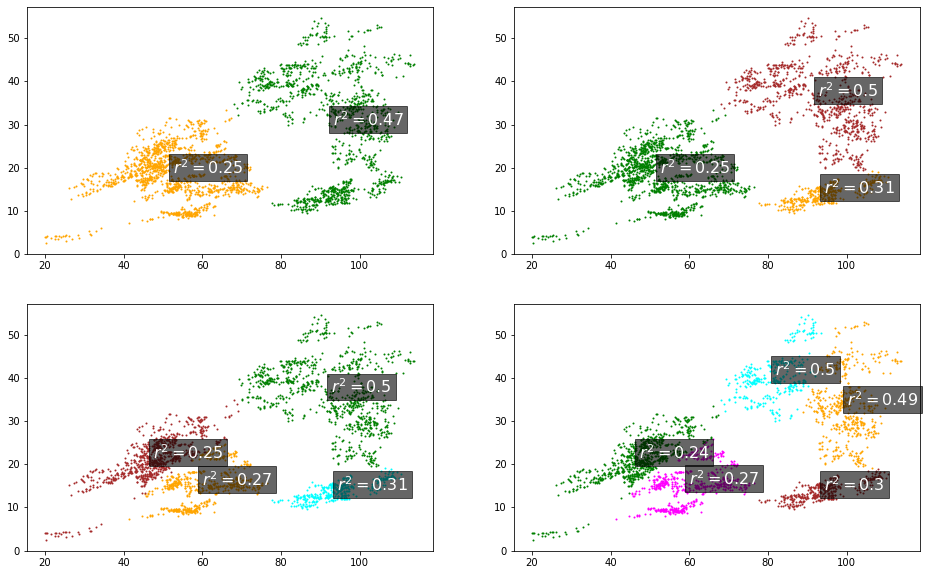

In [56]:
papel = "YPF"  
data = pd.read_excel("Oil.xlsx")
Px = np.array(list(zip(data['WTI Px'], data[papel + " Px"])))
Var = np.array(list(zip(data['WTI Var'], data[papel + " Var"])))

filas = 2
columnas = 2
fig, ax = plt.subplots(figsize=(16,10), nrows=filas, ncols=columnas)

for i in range (filas*columnas):
    col = i % columnas
    row = i // columnas
    modelo = GaussianMixture(n_components=i+2, n_init=5, covariance_type='full')
    y_means = modelo.fit_predict(Px)

    # Etiqueto los clusteres en el dataframe
    clustersList = list(y_means)
    for j in range(len(data)):
        data.loc[j,'cluster'] = clustersList.pop()

    # Grafico
    for c in range(i+2):

        # correlacion del cluster
        df = data.loc[data.cluster == c]
        co = round(df['WTI Var'].corr(df[papel + " Var"]),2)

        # Puntos y etiqueta del cluster
        ax[row][col].scatter(Px[y_means==c,0],Px[y_means==c,1], s=1, color=colores[c])
        coords = (Px[y_means==c,0].mean(), Px[y_means==c,1].mean())
        t = ax[row][col].annotate(f"$ r^2 = {co} $".format('g'), coords, fontsize=16, c="w")
        t.set_bbox(dict(facecolor='k', alpha=0.6, edgecolor='k'))


plt.show()

# 3D / nD  Clustering

<IPython.core.display.Javascript object>


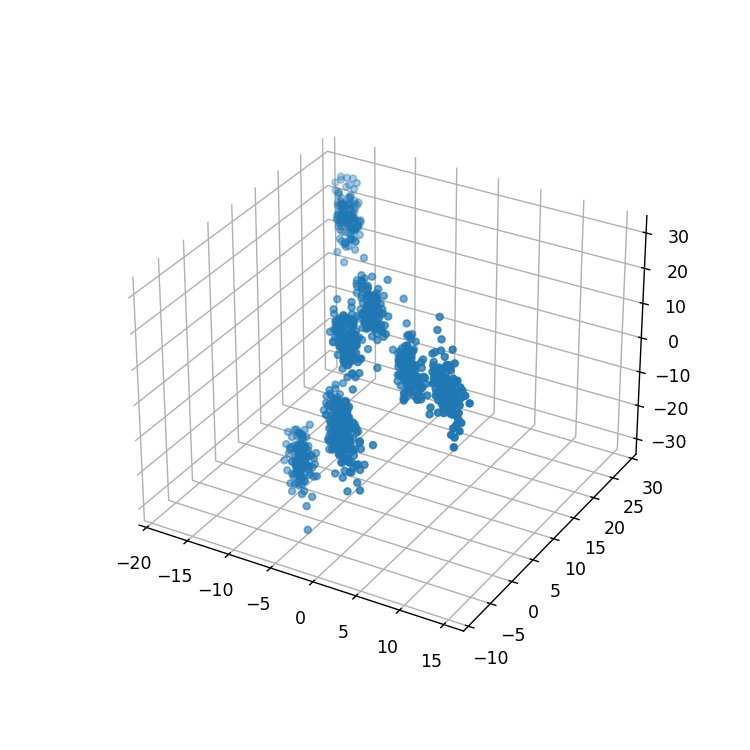

In [57]:
import matplotlib.pyplot as plt

from importlib import reload
reload(plt)
%matplotlib notebook


X, y = make_blobs(n_features=3, n_samples=1000, centers=8, cluster_std=1, random_state=1)
fig, ax = plt.subplots(figsize=(6,6))

rng = np.random.RandomState(2)
transformation = rng.normal(size=(3, 3))
X_estrechos = np.dot(X, transformation)


ax = plt.axes(projection='3d')

ax.scatter(X_estrechos[:,0], X_estrechos[:,1], X_estrechos[:,2], s=15)
ax.w_xaxis.set_pane_color((0,0,0,0))
ax.w_yaxis.set_pane_color((0,0,0,0))
ax.w_zaxis.set_pane_color((0,0,0,0))

plt.show()

<IPython.core.display.Javascript object>


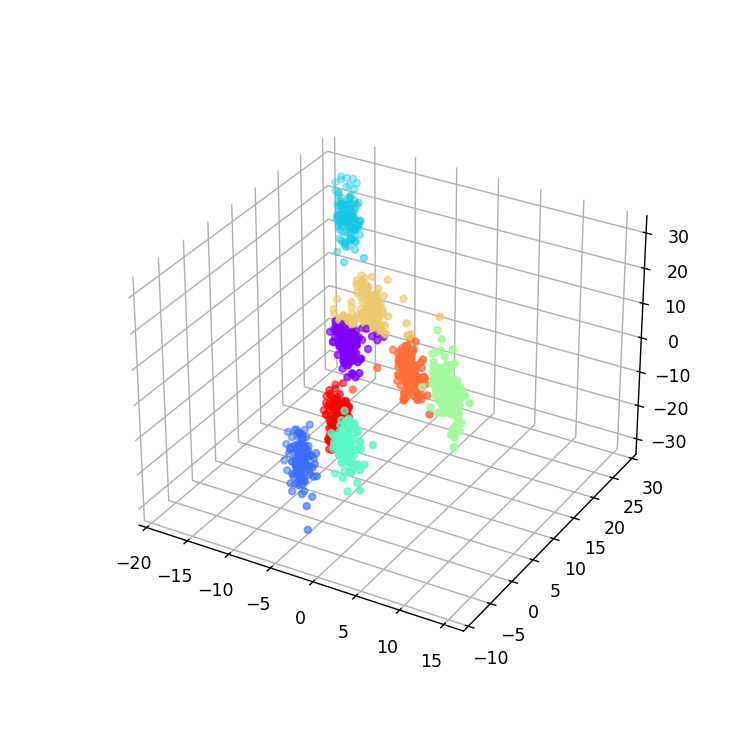

In [58]:
from sklearn.cluster import KMeans

n = 8
modelo = KMeans(n_clusters = n)
y_means = modelo.fit_predict(X_estrechos)
centroides = modelo.cluster_centers_


fig, ax = plt.subplots(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter(X_estrechos[:,0], X_estrechos[:,1], X_estrechos[:,2], s=15, c=y_means, cmap='rainbow')
ax.w_xaxis.set_pane_color((0,0,0,0))
ax.w_yaxis.set_pane_color((0,0,0,0))
ax.w_zaxis.set_pane_color((0,0,0,0))


In [59]:
from sklearn.cluster import KMeans

n = 8
modelo = GaussianMixture(n_components=n, covariance_type='full', n_init=5)
y_means = modelo.fit_predict(X_estrechos)


fig, ax = plt.subplots(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter(X_estrechos[:,0], X_estrechos[:,1], X_estrechos[:,2], s=15, c=y_means, cmap='rainbow')
ax.w_xaxis.set_pane_color((0,0,0,0))
ax.w_yaxis.set_pane_color((0,0,0,0))
ax.w_zaxis.set_pane_color((0,0,0,0))


<IPython.core.display.Javascript object>

In [60]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(1000, noise=0.04, random_state=0)
Z = Xmoon[:,0]**2 + Xmoon[:,1]**2
Xmoon = np.array(list(zip(Xmoon[:,0],Xmoon[:,1],Z)))

fig, ax = plt.subplots(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter(Xmoon[:, 0], Xmoon[:, 1], Xmoon[:, 2], s=15)
ax.w_xaxis.set_pane_color((0,0,0,0))
ax.w_yaxis.set_pane_color((0,0,0,0))
ax.w_zaxis.set_pane_color((0,0,0,0))


<IPython.core.display.Javascript object>

In [61]:
n = 2
modelo = GaussianMixture(n_components=n, covariance_type='full')
y_means = modelo.fit_predict(Xmoon)

fig, ax = plt.subplots(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter(Xmoon[:, 0], Xmoon[:, 1], Xmoon[:, 2], s=15,  c=y_means)
ax.w_xaxis.set_pane_color((0,0,0,0))
ax.w_yaxis.set_pane_color((0,0,0,0))
ax.w_zaxis.set_pane_color((0,0,0,0))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


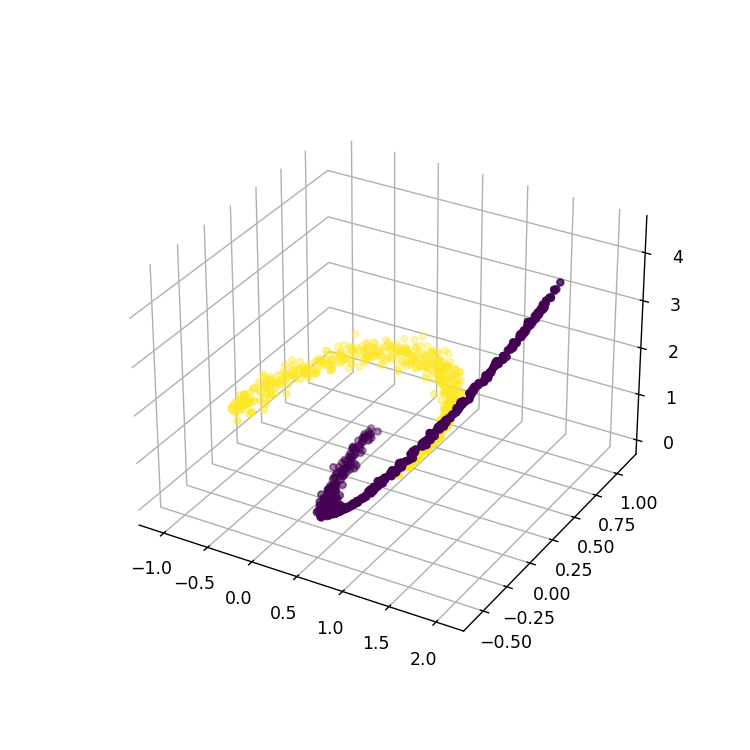

In [62]:
tolerancia = 0.2
modelo = DBSCAN(eps = tolerancia, min_samples=2)
y_means = modelo.fit_predict(Xmoon)

fig, ax = plt.subplots(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter(Xmoon[:, 0], Xmoon[:, 1], Xmoon[:, 2], s=15,  c=y_means)
ax.w_xaxis.set_pane_color((0,0,0,0))
ax.w_yaxis.set_pane_color((0,0,0,0))
ax.w_zaxis.set_pane_color((0,0,0,0))

# Visualizacion 3D en clustering para idea de trading

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>


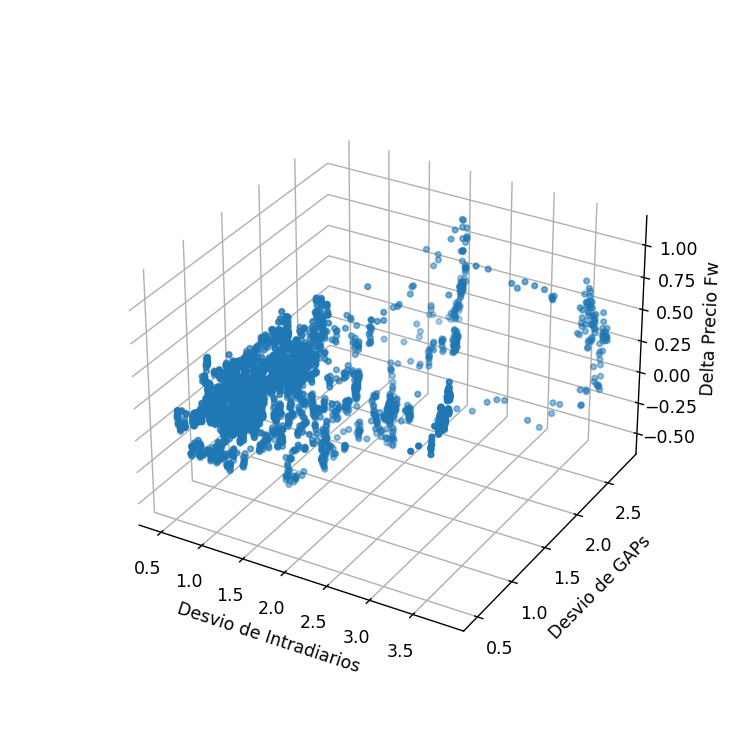

Text(0.5, 0, 'Delta Precio Fw')

In [63]:
import yfinance as yf
df = yf.download('AAPL', start='2005-01-01', auto_adjust='true')
df['intra'] = (df.High/df.Low-1)*100
df['gap'] = (df.Open/df.Close.shift()-1)*100

df['intra_desvio'] = df['intra'].rolling(100).std()
df['gap_desvio'] = df['gap'].rolling(100).std()

df['fw'] = (df.Close.shift(-100)/df.Close-1)
df = df.dropna()

fig, ax = plt.subplots(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter(df['intra_desvio'],df['gap_desvio'],df['fw'], s=10)
ax.w_xaxis.set_pane_color((0,0,0,0))
ax.w_yaxis.set_pane_color((0,0,0,0))
ax.w_zaxis.set_pane_color((0,0,0,0))

ax.set_xlabel('Desvio de Intradiarios')
ax.set_ylabel('Desvio de GAPs')
ax.set_zlabel('Delta Precio Fw')

<IPython.core.display.Javascript object>


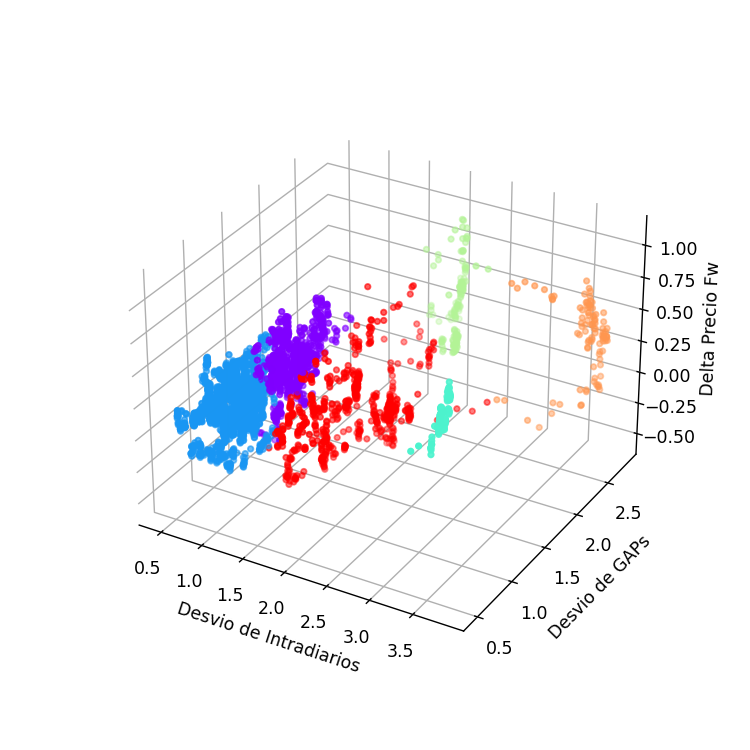

Text(0.5, 0, 'Delta Precio Fw')

In [64]:
X = np.array(list(zip(df['intra_desvio'],df['gap_desvio'],df['fw'])))

n = 6
modelo = GaussianMixture(n_components=n, covariance_type='full')
y_means = modelo.fit_predict(X)

fig, ax = plt.subplots(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=10,  c=y_means, cmap='rainbow')
ax.w_xaxis.set_pane_color((0,0,0,0))
ax.w_yaxis.set_pane_color((0,0,0,0))
ax.w_zaxis.set_pane_color((0,0,0,0))

ax.set_xlabel('Desvio de Intradiarios')
ax.set_ylabel('Desvio de GAPs')
ax.set_zlabel('Delta Precio Fw')

In [65]:
res = df.copy()
res['etiquetas'] = np.array(y_means)
medias = res.groupby('etiquetas').mean().loc[:,['intra','gap','intra_desvio','gap_desvio','fw']]
medias.sort_values('fw', ascending=False)

intra       gap  intra_desvio  gap_desvio        fw
etiquetas                                                        
3          3.494420  0.073499      2.274048    2.426812  0.485480
4          5.491224 -0.080614      3.655179    2.619969  0.371704
0          2.417397  0.162580      1.195918    1.349833  0.289128
2          2.738392  0.239361      3.011302    1.315109  0.249084
1          1.802749  0.104365      0.859028    0.923056  0.113142
5          3.363640  0.228922      1.756591    1.505325 -0.054780

In [66]:
res.groupby('etiquetas').size()

etiquetas
0     888
1    2063
2     100
3     138
4     102
5     659
dtype: int64